In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import yfinance as yf

In [3]:
# data for S&P500
ticker = yf.Ticker('^GSPC')

SP500_df = ticker.history(period="max", interval='1d')

Text(0, 0.5, 'Stock Price')

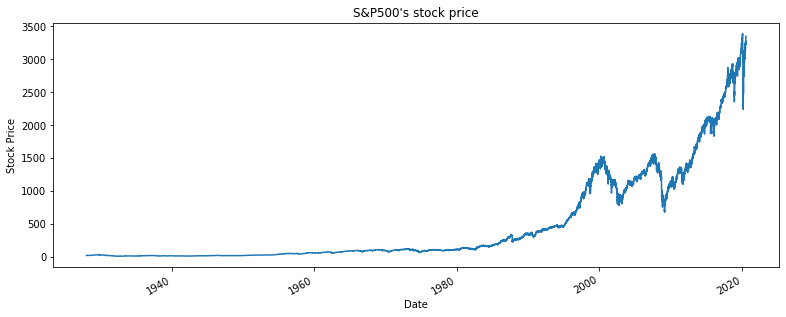

In [4]:
plt.figure(figsize=(13, 5))
SP500_df['Close'].plot(title="S&P500's stock price")
plt.xlabel('Date')
plt.ylabel('Stock Price')

In [5]:
SP500_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30,17.66,17.66,17.66,17.66,0,0,0
1928-01-03,17.76,17.76,17.76,17.76,0,0,0
1928-01-04,17.72,17.72,17.72,17.72,0,0,0
1928-01-05,17.55,17.55,17.55,17.55,0,0,0
1928-01-06,17.66,17.66,17.66,17.66,0,0,0


In [6]:
SP500_df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-07-31,3270.45,3272.17,3220.26,3271.12,5117260000,0,0
2020-08-03,3288.26,3302.73,3284.53,3294.61,4643640000,0,0
2020-08-04,3289.92,3306.84,3286.37,3306.51,4621670000,0,0
2020-08-05,3317.37,3330.77,3317.37,3327.77,4732220000,0,0
2020-08-06,3323.17,3351.03,3318.14,3349.16,2414278723,0,0


In [7]:
SP500_df.shape

(23260, 7)

In [8]:
SP500_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23260 entries, 1927-12-30 to 2020-08-06
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          23260 non-null  float64
 1   High          23260 non-null  float64
 2   Low           23260 non-null  float64
 3   Close         23260 non-null  float64
 4   Volume        23260 non-null  int64  
 5   Dividends     23260 non-null  int64  
 6   Stock Splits  23260 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 1.4 MB


In [9]:
SP500_df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,23260.000000,23260.000000,23260.000000,23260.000000,2.326000e+04,23260.0,23260.0
mean,478.937092,481.752575,475.937768,479.038887,7.599377e+08,0.0,0.0
std,711.158543,714.960392,707.002488,711.272077,1.475980e+09,0.0,0.0
min,4.400000,4.400000,4.400000,4.400000,0.000000e+00,0.0,0.0
25%,23.800000,23.800000,23.800000,23.800000,1.260000e+06,0.0,0.0
50%,99.320000,100.120000,98.565000,99.330000,1.708000e+07,0.0,0.0
75%,812.610000,826.120000,804.217500,813.140000,5.182400e+08,0.0,0.0
max,3380.450000,3393.520000,3378.830000,3386.150000,1.145623e+10,0.0,0.0


In [10]:
SP500_df.drop(columns=['Dividends', 'Stock Splits'], inplace=True)
SP500_df.corr()

,Open,High,Low,Close,Volume
Open,1.000000,0.999972,0.999958,0.999930,0.819787
High,0.999972,1.000000,0.999941,0.999963,0.820751
Low,0.999958,0.999941,1.000000,0.999965,0.818435
Close,0.999930,0.999963,0.999965,1.000000,0.819575
Volume,0.819787,0.820751,0.818435,0.819575,1.000000


In [11]:
# train-test splitting
train_data = SP500_df['Open'].values[:-90]
test_data = SP500_df['Open'].values[-90:]

In [12]:
# data preprocessing
train = train_data.reshape(-1, 1)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train = scaler.fit_transform(train)

# prepare training dataset for 60 timesteps
x_train = []
y_train = []

for i in range(train.shape[0]-60):
    x_train.append(train[i:i+60, 0])
    y_train.append(train[i+60, 0])
    
x_train = np.array(x_train)
y_train = np.array(y_train)

x_train = np.reshape(x_train, newshape=(x_train.shape[0], x_train.shape[1], 1))

In [13]:
x_train.shape

(23110, 60, 1)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras import metrics

In [17]:
model = Sequential()

# model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(rate=0.1))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(rate=0.1))

model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(rate=0.1))

model.add(Dense(units=1))
# model.summary()
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[metrics.mae])

In [18]:
model.fit(x_train, y_train, batch_size=64, epochs=3, verbose=1)

Train on 23110 samples
Epoch 1/3
23110/23110 [==============================] - 64s 3ms/sample - loss: 0.0013 - mean_absolute_error: 0.0148
Epoch 2/3
23110/23110 [==============================] - 56s 2ms/sample - loss: 3.1332e-04 - mean_absolute_error: 0.0092
Epoch 3/3
23110/23110 [==============================] - 65s 3ms/sample - loss: 3.0193e-04 - mean_absolute_error: 0.0090


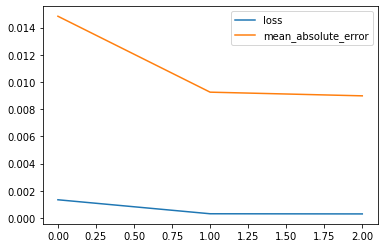

In [19]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [20]:
# # hyperparameter tuning
# from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

# def create_model(l=4, n=50, r=0.1, opt='rmsprop'):
#     model = Sequential()
#     for j in range(l):
#         model.add(LSTM(units=n, return_sequences=True))
#         model.add(Dropout(rate=r))
#     model.add(Dense(units=1))
#     model.compile(optimizer=opt, loss='mean_squared_error', metrics=[metrics.mae])
#     return model
    
# model = KerasRegressor(build_fn=create_model, epochs=6, batch_size=32)

# from sklearn.model_selection import RandomizedSearchCV

# parameters = dict(n=[40, 50, 60, 70, 80],
#                   r=[0.1, 0.3, 0.5],
#                   l=[3, 4, 5, 6],
#                   batch_size=[32, 64, 128],
#                   opt=['sgd', 'rmsprop', 'adam'])

# tuner = RandomizedSearchCV(model, param_distributions=parameters, cv=3, n_iter=10, n_jobs=-1, verbose=1)

# tuned_results = tuner.fit(x_train, y_train)


# # summarize results
# print("Best: %f using %s" % (tuned_results.best_score_, tuned_results.best_params_))

# means = tuned_results.cv_results_['mean_test_score']
# stds = tuned_results.cv_results_['std_test_score']
# params = tuned_results.cv_results_['params']
# # for mean, stdev, param in zip(means, stds, params):
# #     print("%f (%f) with: %r" % (mean, stdev, param))

In [22]:
total_data = SP500_df['Open'].values.reshape(-1, 1)

total_data = scaler.transform(total_data)

x_test = []
for i in range(len(test_data)):
    x_test.append(total_data[i-len(test_data)-60:i-len(test_data), 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, newshape=(x_test.shape[0], x_test.shape[1], 1))

In [23]:
y_true = test_data.reshape(-1, 1)
y_test = scaler.transform(y_true)

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [24]:
from sklearn.metrics import mean_squared_error
RMSE = round(np.sqrt(mean_squared_error(y_true, predictions)), 2)
print(RMSE)
# print(y_true.mean())

139.16
3010.838888888888


In [25]:
model.evaluate(x_test, y_test)

90/90 [==============================] - 1s 9ms/sample - loss: 0.0017 - mean_absolute_error: 0.0361


[0.001699175483857592, 0.036129232]

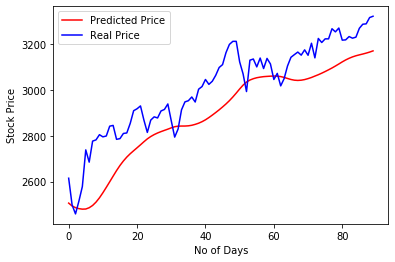

In [26]:
plt.plot(predictions, color='red', label='Predicted Price')
plt.plot(y_true, color='blue', label='Real Price')
plt.xlabel('No of Days')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
# Save model
import joblib
from tensorflow.keras.models import save_model

model.save("Base_model.h5")
print("Model dumped!")